<a href="https://colab.research.google.com/github/Eri0738/machine_learning/blob/main/ML%E5%AE%9F%E5%8A%9B%E3%83%86%E3%82%B9%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#実力テスト

##データの確認

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
#データの読み込み
df_train = pd.read_csv("bank_train.csv")
df_test = pd.read_csv("bank_test.csv")
df_pred = pd.read_csv("bank_pred.csv")
df_train.head(1)

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome,result
0,50.0,entrepreneur,married,secondary,no,1857,no,yes,-1.0,0,unknown,fail


In [ ]:
df_test.head(1)

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome,result
0,55.0,self-employed,married,tertiary,no,1810,yes,no,-1.0,0,unknown,fail


In [ ]:

df_pred.head(1)

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome
0,53,services,married,secondary,no,1364,no,no,-1,0,unknown


In [ ]:
# データの形を確認
df_train.shape

(6416, 12)

In [ ]:
df_test.shape

(15000, 12)

In [ ]:
df_pred.shape

(10000, 11)

##データ前処理　基礎

###重複


In [ ]:
#重複行の削除
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()
df_train.duplicated(keep=False).value_counts()


False    6384
dtype: int64

In [ ]:
df_pred.shape

(10000, 11)

###欠損値

- 平均値補完：
df = df.fillna({'bmi':df['bmi'].mean()})

- 最頻値補完：
df = df.fillna({'smoker':df['smoker'].mode()[0]})

In [ ]:
df_train.isnull().sum()

age           90
job            3
marital       89
education      0
default       29
balance        0
housing       61
loan         217
pdays         36
previous       0
poutcome     250
result         0
dtype: int64

In [ ]:
# 定性的なデータの確認（代表値の確認）
df_train.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome,result
count,6294.000000,6381,6295,6384,6355,6384.000000,6323,6167,6348.000000,6384.000000,6134,6384
unique,NaN,12,3,4,2,NaN,2,2,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,NaN,NaN,unknown,fail
freq,NaN,1434,3813,3282,6229,NaN,3483,5143,NaN,NaN,4966,5651
mean,40.995551,NaN,NaN,NaN,NaN,1336.200501,NaN,NaN,39.821204,0.576284,NaN,NaN
std,10.623109,NaN,NaN,NaN,NaN,2716.573432,NaN,NaN,97.948651,1.959517,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,78.000000,NaN,NaN,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,477.500000,NaN,NaN,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1472.000000,NaN,NaN,-1.000000,0.000000,NaN,NaN


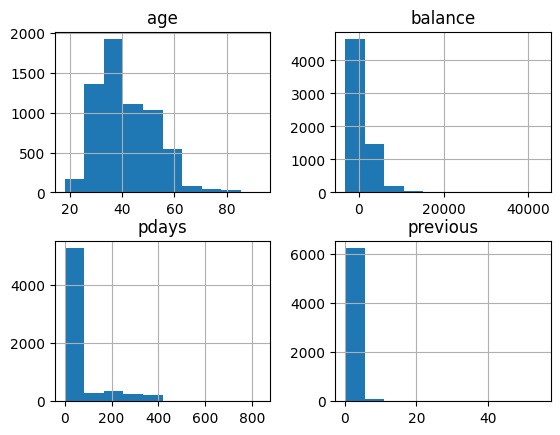

In [ ]:
df_train.hist();

In [ ]:
df_train = df_train.fillna({'age':df_train['age'].median()})
df_train = df_train.fillna({'pdays':df_train['pdays'].mean()})
df_train = df_train.fillna({'job':df_train['job'].mode()[0]})
df_train = df_train.fillna({'marital':df_train['marital'].mode()[0]})
df_train = df_train.fillna({'default':df_train['default'].mode()[0]})
df_train = df_train.fillna({'housing':df_train['housing'].mode()[0]})
df_train = df_train.fillna({'loan':df_train['loan'].mode()[0]})
df_train = df_train.fillna({'poutcome':df_train['poutcome'].mode()[0]})

In [ ]:
df_train.shape

(6384, 12)

df_train = df_train.dropna(subset=['age'])
df_train = df_train.dropna(subset=['job'])
df_train = df_train.dropna(subset=['marital'])
df_train = df_train.dropna(subset=['default'])
df_train = df_train.dropna(subset=['housing'])
df_train = df_train.dropna(subset=['loan'])
df_train = df_train.dropna(subset=['pdays'])
df_train = df_train.dropna(subset=['poutcome'])
df_train.shape


In [ ]:
df_test.isnull().sum()

age           35
job            8
marital       45
education      0
default       62
balance        0
housing      114
loan          24
pdays         78
previous       0
poutcome     152
result         0
dtype: int64

In [ ]:
df_test.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome,result
count,14775.000000,14802,14765,14810,14748,14810.000000,14696,14786,14732.000000,14810.000000,14658,14810
unique,NaN,12,3,4,2,NaN,2,2,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,NaN,NaN,unknown,fail
freq,NaN,3188,8882,7551,14460,NaN,8072,12367,NaN,NaN,11870,13053
mean,40.975635,NaN,NaN,NaN,NaN,1376.253950,NaN,NaN,41.663318,0.572519,NaN,NaN
std,10.643659,NaN,NaN,NaN,NaN,2990.198113,NaN,NaN,101.107159,1.763110,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,80.000000,NaN,NaN,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,463.000000,NaN,NaN,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1434.000000,NaN,NaN,-1.000000,0.000000,NaN,NaN


In [ ]:
#df_test.hist();

df_test = df_test.dropna(subset=['age'])
df_test = df_test.dropna(subset=['job'])
df_test = df_test.dropna(subset=['marital'])
df_test = df_test.dropna(subset=['default'])
df_test = df_test.dropna(subset=['housing'])
df_test = df_test.dropna(subset=['loan'])
df_test = df_test.dropna(subset=['pdays'])
df_test = df_test.dropna(subset=['poutcome'])
df_test.shape

In [ ]:
df_test = df_test.fillna({'age':df_test['age'].mean()})
df_test = df_test.fillna({'pdays':df_test['pdays'].mean()})
df_test = df_test.fillna({'job':df_test['job'].mode()[0]})
df_test = df_test.fillna({'marital':df_test['marital'].mode()[0]})
df_test = df_test.fillna({'default':df_test['default'].mode()[0]})
df_test = df_test.fillna({'housing':df_test['housing'].mode()[0]})
df_test = df_test.fillna({'loan':df_test['loan'].mode()[0]})
df_test = df_test.fillna({'poutcome':df_test['poutcome'].mode()[0]})

In [ ]:
df_pred.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
pdays        0
previous     0
poutcome     0
dtype: int64

In [ ]:
#df_pred.describe(include='all')

In [ ]:
#df_pred.hist();

###カテゴリカル変数

In [ ]:
# クラス分けのリストの定義
class_3 = ['entrepreneur', 'management']
class_2 = ['blue-collar', 'services', 'self-employed', 'admin.', 'technician']
class_1 = ['student', 'unemployed', 'unknown' ,'housemaid', 'retired']

In [ ]:
# それぞれを置換するリストの作成
maker_class = []
for i in df_train['job']:
    if i in class_3:
        maker_class.append(3)
    elif i in class_2:
        maker_class.append(2)
    elif i in class_1:
        maker_class.append(1)

In [ ]:
# 列を追加
df_train['maker_class']  = maker_class

In [ ]:
maker_class = []
for i in df_test['job']:
    if i in class_3:
        maker_class.append(3)
    elif i in class_2:
        maker_class.append(2)
    elif i in class_1:
        maker_class.append(1)
        # 列を追加
df_test['maker_class']  = maker_class
maker_class = []
for i in df_pred['job']:
    if i in class_3:
        maker_class.append(3)
    elif i in class_2:
        maker_class.append(2)
    elif i in class_1:
        maker_class.append(1)
        # 列を追加
df_pred['maker_class']  = maker_class
df_train = df_train.drop(labels='job', axis=1)
df_test = df_test.drop(labels='job', axis=1)
df_pred = df_pred.drop(labels='job', axis=1)

In [ ]:
# モデルの宣言
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
#label encoding
# カテゴリカル変数を含んだデータのみを抽出
df_train_obj = df_train.select_dtypes(include='object')
df_train_uni = df_train_obj.nunique()
# ユニークな値が 2 種類の列名のみ取得
df_train_cols = df_train_uni[df_train_uni == 2].index
for col in df_train_cols:
  le = LabelEncoder()
  le.fit(df_train[col])
  df_train[col] = le.transform(df_train[col])

df_test_obj = df_test.select_dtypes(include='object')
df_test_uni = df_test_obj.nunique()
df_test_cols = df_test_uni[df_test_uni == 2].index
for col in df_test_cols:
  le = LabelEncoder()
  le.fit(df_test[col])
  df_test[col] = le.transform(df_test[col])

df_pred_obj = df_pred.select_dtypes(include='object')
df_pred_uni = df_pred_obj.nunique()
df_pred_cols = df_pred_uni[df_pred_uni == 2].index
for col in df_pred_cols:
  le = LabelEncoder()
  le.fit(df_pred[col])
  df_pred[col] = le.transform(df_pred[col])

df_train.head(1)

,age,marital,education,default,balance,housing,loan,pdays,previous,poutcome,result,maker_class
0,50.0,married,secondary,0,1857,0,1,-1.0,0,unknown,0,3


In [ ]:
#one hot encoding
df_train = pd.get_dummies(df_train, drop_first=False)
df_test = pd.get_dummies(df_test, drop_first=False)
df_pred = pd.get_dummies(df_pred, drop_first=False)
df_train = df_train.drop(labels='marital_single', axis=1)
df_test = df_test.drop(labels='marital_single', axis=1)
df_pred = df_pred.drop(labels='marital_single', axis=1)

In [ ]:
df_train = df_train.drop(labels='education_unknown', axis=1)
df_test = df_test.drop(labels='education_unknown', axis=1)
df_pred = df_pred.drop(labels='education_unknown', axis=1)

In [ ]:
df_train = df_train.drop(labels='poutcome_unknown', axis=1)
df_test = df_test.drop(labels='poutcome_unknown', axis=1)
df_pred = df_pred.drop(labels='poutcome_unknown', axis=1)

In [ ]:
df_train.head(1)

,age,default,balance,housing,loan,pdays,previous,result,maker_class,marital_divorced,marital_married,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success
0,50.0,0,1857,0,1,-1.0,0,0,3,0,1,0,1,0,0,0,0


##データの前処理　応用

###外れ値除去

3σ法
mu = df_train['pdays'].mean() # 平均値
sigma = df_train['pdays'].std() # 標準偏差
3σ法の中身を取得
df_train = df_train[(mu - 3 * sigma <= df_train['pdays']) & (df_train['pdays'] <= mu + 3 * sigma)]

In [ ]:
df_train.shape

(6384, 17)

In [ ]:
mu = df_train['previous'].mean() # 平均値 
sigma = df_train['previous'].std() # 標準偏差 3σ法の中身を取得 
df_train = df_train[(mu - 3 * sigma <= df_train['previous']) & (df_train['previous'] <= mu + 3 * sigma)]
#df2.shape

In [ ]:
#ハンペル判別法
# MADを算出
median = df_train['balance'].median()
# absは指定の値を絶対値に変換。np.medianで中央値を算出
MAD = 1.4826 * np.median(abs(df_train['balance']-median))
df_train = df_train[(median - 3 * MAD < df_train['balance']) & (df_train['balance'] < median + 3 * MAD)]

In [ ]:
df_train.shape

(5342, 17)

###変数

In [ ]:
# 入力変数と出力変数の切り分け
t_train = pd.Series(df_train["result"], dtype="int64").values
x_train = df_train.drop(["result"], axis=1).values
t_test = pd.Series(df_test["result"], dtype="int64").values
x_test = df_test.drop(["result"], axis=1).values
x_pred = df_pred.values

##ロジスティック回帰

In [ ]:
# モデルの定義
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
# モデルの学習
model.fit(x_train, t_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# 推論
y_pred = model.predict(x_pred)

In [ ]:
# 推論結果を、 success, fail に書き換える
y_list = np.where(y_pred, 'success', 'fail').tolist()

In [ ]:
# Windows
pd.Series(y_list, name='pred').to_csv('ml_submission.csv', index=None, line_terminator='\n')

<ipython-input-42-ba613ed5a5d9>:2: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  pd.Series(y_list, name='pred').to_csv('ml_submission.csv', index=None, line_terminator='\n')


In [ ]:
df_pred.shape

(10000, 16)

In [ ]:
f1_score = metrics.f1_score(x_train, t_train, average=None)
f1_score

ValueError: ignored